In [112]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import geopandas as gpd
from geopandas.tools import overlay
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pylab as pl 
import shapely
from fiona.crs import from_epsg
import urllib
from matplotlib.ticker import FuncFormatter



# to Plot matplotlib figures inline on the notebook
%matplotlib inline

In [113]:
%pwd

'/Users/geribauer/nyc-art-galleries'

# New York City Art Galleries

## Website Link: https://data.cityofnewyork.us/Recreation/New-York-City-Art-Galleries/tgyc-r5jh

![nyc-art-galleries](nyc-art-galleries.png)

In [7]:
url = 'https://data.cityofnewyork.us/api/geospatial/tgyc-r5jh?method=export&format=Shapefile'

In [8]:
nyc_art_galleries = gpd.read_file(url)

In [9]:
nyc_art_galleries.head()

,address1,address2,city,name,tel,url,zip,geometry
0,52 E 76th St,None,New York,O'reilly William & Co Ltd,(212) 396-1822,http://www.nyc.com/arts__attractions/oreilly_w...,10021.0,POINT (-73.96273074561996 40.77380087163758)
1,19 Hudson St.,None,New York,Organization of Independent Artists - Gallery 402,(212) 219-9213,http://www.nonprofitgallery.com/main/usa/ny/oi...,10013.0,POINT (-74.0093857886298 40.71646850931738)
2,19 E 75th St,None,New York,Owen Gallery,(212) 879-2415,http://www.owengallery.com/about-us,10021.0,POINT (-73.96435178145856 40.7740008522409)
3,511 W 25th St,None,New York,P P O W Gallerie,(212) 647-1044,http://www.ppowgallery.com/,10001.0,POINT (-74.00389261044238 40.74958540084406)
4,476 Broome St,None,New York,P P O W Inc,(212) 941-8642,http://www.nyc.com/arts__attractions/p_p_o_w_i...,10013.0,POINT (-74.00176389614576 40.72290742771331)


In [11]:
#saving raw data
nyc_art_galleries.to_csv('data/nyc-art-galleries.csv')

In [12]:
nyc_art_galleries.crs

{'init': 'epsg:4326'}

In [13]:
nyc_art_galleries = nyc_art_galleries.to_crs(epsg=2263)

(937143.5548104757, 1058945.2925470127, 150859.74083853126, 267399.36303149693)

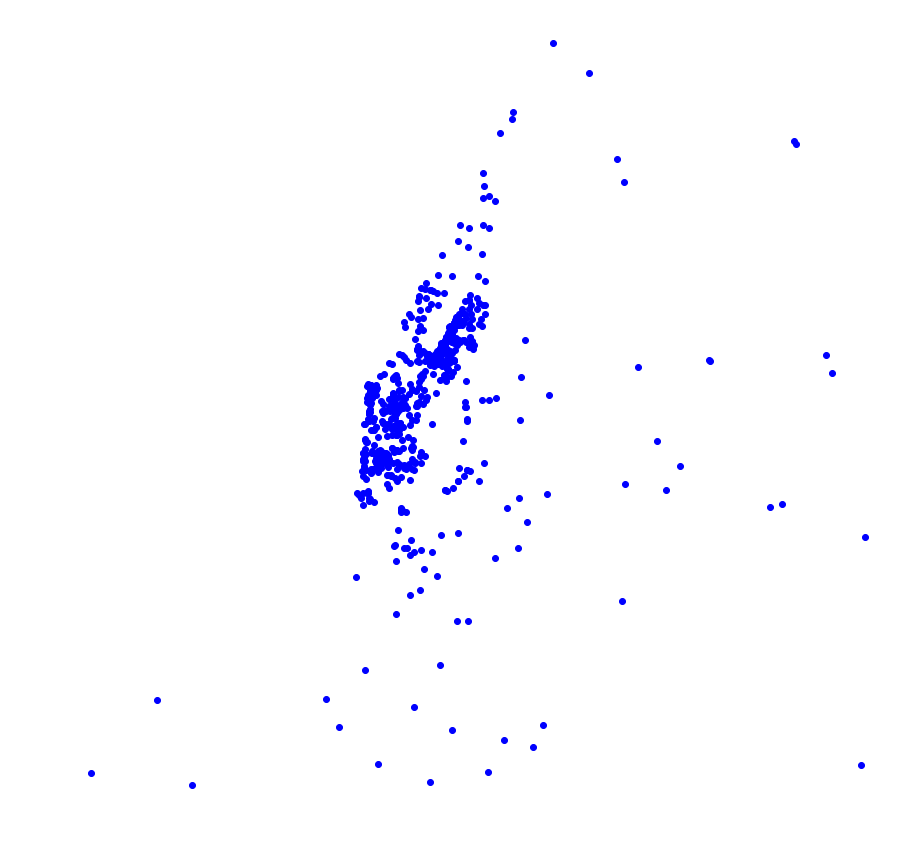

In [14]:
fig, ax = plt.subplots(figsize=(20,15))

nyc_art_galleries.plot(ax=ax, color='b')

# Insert comment here
plt.axis('off')

# Neighborhood Tabulation Areas

## Website Link: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq

![nyc-nta-neighborhoods](nyc-nta-neighborhoods.png)

In [15]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'

In [16]:
nta = gpd.read_file(url)

In [17]:
nta.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228074,POLYGON ((-73.97604935657381 40.63127590564677...
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,POLYGON ((-73.80379022888246 40.77561011179248...
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711538,"POLYGON ((-73.86109724401859 40.7636644770877,..."
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335837,POLYGON ((-73.75725671509139 40.71813860166257...
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.686548,"POLYGON ((-73.94607828608069 40.8212632160616,..."


In [18]:
nta.crs

{'init': 'epsg:4326'}

In [19]:
nta = nta.to_crs(epsg=2263)

In [20]:
nta_mn  = nta.loc[nta.boro_name == 'Manhattan']

(969060.8804534903, 1012018.2553497335, 184509.0499877447, 263121.0427855848)

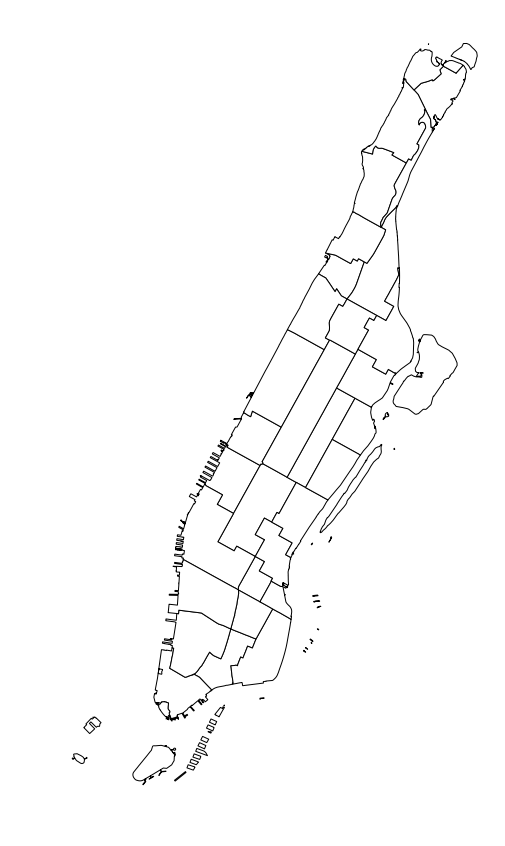

In [21]:
fig, ax = plt.subplots(figsize=(20,15))

nta_mn.plot(ax=ax, color='w', edgecolor='black')

# Insert comment here
plt.axis('off')

In [22]:
nta.dtypes

boro_code     float64
boro_name      object
county_fip     object
ntacode        object
ntaname        object
shape_area    float64
shape_leng    float64
geometry       object
dtype: object

# Converting Shape Area to Acres

## Using Yorkville as reference

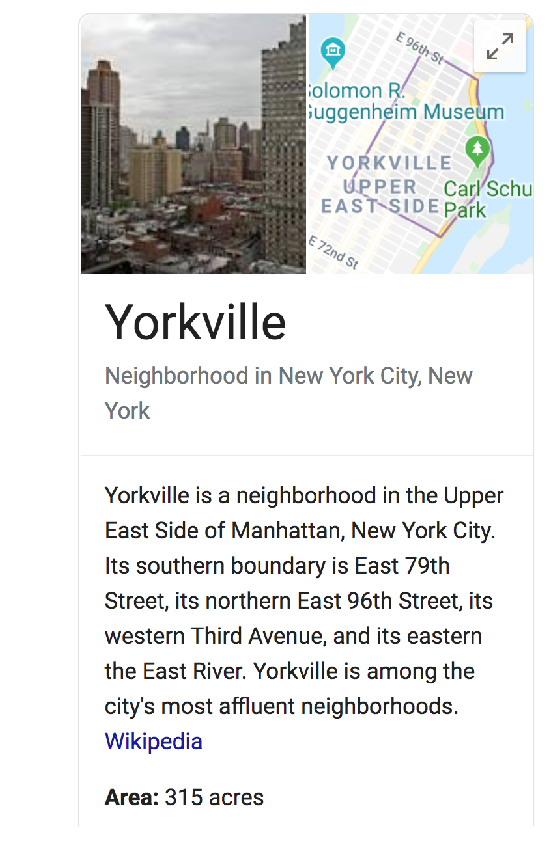

In [23]:
# defining our plot
plt.subplots(figsize=(15,15))
ax = plt.subplot()

# read the image
im = plt.imread('images/acres-conversion.png')

plt.imshow(im)
plt.axis('off')
plt.show()

In [24]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [25]:
nta_mn.loc[nta.ntacode == 'MN32']

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
119,1.00000,Manhattan,061,MN32,Yorkville,13602063.88740,17998.72063,"(POLYGON ((1001407.71459961 223760.1755980852,..."


In [26]:
Yorkville = nta.loc[nta.ntacode == 'MN32']

In [27]:
Yorkville

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
119,1.00000,Manhattan,061,MN32,Yorkville,13602063.88740,17998.72063,"(POLYGON ((1001407.71459961 223760.1755980852,..."


In [28]:
area = 315

conversion = (area / 13602063.88740)

In [29]:
conversion

2.315825029257464e-05

In [30]:
conversion * (Yorkville.shape_area)

119   315.00000
Name: shape_area, dtype: float64

In [31]:
nta_mn.shape_area.dtype

dtype('float64')

In [32]:
nta_mn['area (acres)'] = nta_mn.shape_area * conversion

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
nta_mn[['ntaname', 'shape_area', 'area (acres)']].head()

,ntaname,shape_area,area (acres)
4,Manhattanville,10647077.61220,246.56769
50,Clinton,18362149.83110,425.23526
84,Chinatown,14501867.88280,335.83789
86,Battery Park City-Lower Manhattan,19014299.21810,440.33790
88,Lincoln Square,15805586.59240,366.02973


In [34]:
nta_mn.crs

{'init': 'epsg:2263', 'no_defs': True}

In [35]:
nyc_art_galleries.crs

{'init': 'epsg:2263', 'no_defs': True}

In [36]:
nta_galleries = gpd.sjoin(nyc_art_galleries, nta_mn, op='within')

In [37]:
nta_galleries.head()

,address1,address2,city,name,tel,url,zip,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,area (acres)
0,52 E 76th St,None,New York,O'reilly William & Co Ltd,(212) 396-1822,http://www.nyc.com/arts__attractions/oreilly_w...,10021.00000,POINT (994572.6095922113 221195.5218975086),90,1.00000,Manhattan,061,MN40,Upper East Side-Carnegie Hill,20065364.12530,23778.41036,464.67872
2,19 E 75th St,None,New York,Owen Gallery,(212) 879-2415,http://www.owengallery.com/about-us,10021.00000,POINT (994123.5953983773 221268.194652427),90,1.00000,Manhattan,061,MN40,Upper East Side-Carnegie Hill,20065364.12530,23778.41036,464.67872
15,188 E 64th St,None,New York,Pall William Inc,(212) 758-3340,http://local.botw.org/New_York/New_York/Pall_W...,10021.00000,POINT (993997.4227504528 217809.8508473375),90,1.00000,Manhattan,061,MN40,Upper East Side-Carnegie Hill,20065364.12530,23778.41036,464.67872
16,40 E 94th St,None,New York,Palmer Meredith Gallery,(212) 828-9100,http://www.artinfo.com/galleryguide/12649/1149...,10128.00000,POINT (996760.7663051279 225507.54805035),90,1.00000,Manhattan,061,MN40,Upper East Side-Carnegie Hill,20065364.12530,23778.41036,464.67872
25,980 Madison Ave,None,New York,Peck Ian Fine Paintings Ltd,(212) 396-2442,http://gallerydriver.com/?method=Gallery.Galle...,10021.00000,POINT (994317.8197474577 221545.0513821711),90,1.00000,Manhattan,061,MN40,Upper East Side-Carnegie Hill,20065364.12530,23778.41036,464.67872


In [38]:
nta_galleries.shape

(823, 17)

In [39]:
nta_galleries.boro_name.unique()

array(['Manhattan'], dtype=object)

In [40]:
nta_galleries = nta_galleries.groupby('ntaname').count()

In [41]:
nta_galleries.head()

,address1,address2,city,name,tel,url,zip,geometry,index_right,boro_code,boro_name,county_fip,ntacode,shape_area,shape_leng,area (acres)
ntaname,,,,,,,,,,,,,,,,
Battery Park City-Lower Manhattan,13,2,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Central Harlem North-Polo Grounds,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Central Harlem South,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Chinatown,17,0,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Clinton,10,1,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [42]:
nta_galleries.reset_index(inplace=True)

In [43]:
nta_galleries.head()

,ntaname,address1,address2,city,name,tel,url,zip,geometry,index_right,boro_code,boro_name,county_fip,ntacode,shape_area,shape_leng,area (acres)
0,Battery Park City-Lower Manhattan,13,2,13,13,13,13,13,13,13,13,13,13,13,13,13,13
1,Central Harlem North-Polo Grounds,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,Central Harlem South,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,Chinatown,17,0,17,17,17,17,17,17,17,17,17,17,17,17,17,17
4,Clinton,10,1,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [44]:
# selecting only important columns
nta_galleries = nta_galleries[['ntaname','name']]

In [45]:
nta_galleries.head()

,ntaname,name
0,Battery Park City-Lower Manhattan,13
1,Central Harlem North-Polo Grounds,3
2,Central Harlem South,2
3,Chinatown,17
4,Clinton,10


In [46]:
# renaming our count column as 'claimscount'
nta_galleries.rename(columns={"name": "numofgalleries"}, inplace=True)

In [47]:
nta_galleries.head()

,ntaname,numofgalleries
0,Battery Park City-Lower Manhattan,13
1,Central Harlem North-Polo Grounds,3
2,Central Harlem South,2
3,Chinatown,17
4,Clinton,10


In [48]:
nta_galleries.shape

(25, 2)

In [49]:
nta_galleries.dtypes

ntaname           object
numofgalleries     int64
dtype: object

In [50]:
nta_galleries.numofgalleries.astype(int, inplace=True).head()

0    13
1     3
2     2
3    17
4    10
Name: numofgalleries, dtype: int64

In [51]:
nta_galleries = nta_mn.merge(nta_galleries, left_on="ntaname", 
              right_on="ntaname")

In [52]:
nta_galleries.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,area (acres),numofgalleries
0,1.00000,Manhattan,061,MN06,Manhattanville,10647077.61220,17040.68655,"POLYGON ((999174.2608032241 238490.1047973094,...",246.56769,1
1,1.00000,Manhattan,061,MN15,Clinton,18362149.83110,34481.62954,"POLYGON ((985958.6517944358 220876.7498168417,...",425.23526,10
2,1.00000,Manhattan,061,MN27,Chinatown,14501867.88280,20786.25639,"POLYGON ((988733.8851928725 202128.9697875357,...",335.83789,17
3,1.00000,Manhattan,061,MN25,Battery Park City-Lower Manhattan,19014299.21810,43738.49900,(POLYGON ((984032.8837890599 192223.7485961345...,440.33790,13
4,1.00000,Manhattan,061,MN14,Lincoln Square,15805586.59240,19869.90868,"POLYGON ((991173.6492309589 222552.1517943803,...",366.02973,10


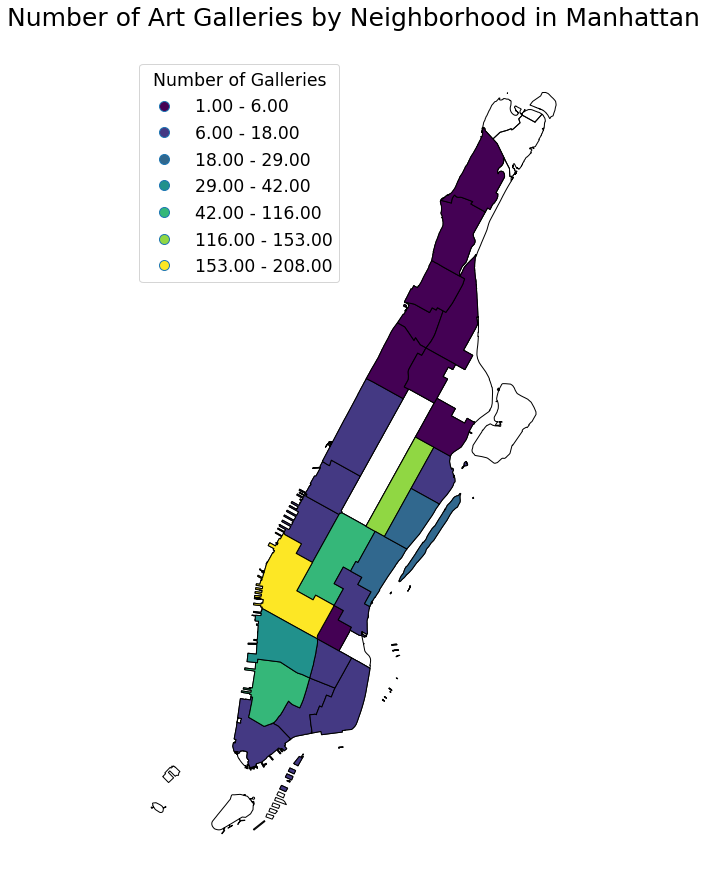

In [53]:
# defining our plot
plt.subplots(figsize=(20,15))
ax = plt.subplot()

nta_mn.plot(ax=ax, color='None', edgecolor='black')

nta_galleries.plot(column="numofgalleries", ax=ax, k=7, 
                   scheme='fisher_jenks', label=True, legend=True, 
                   legend_kwds={'loc': 'upper left', 'title': 'Number of Galleries', 
                   'title_fontsize': 'xx-large','fontsize': 'xx-large'}, 
                   cmap='viridis', edgecolor='black')

ax.set_title("Number of Art Galleries by Neighborhood in Manhattan", fontsize=25, pad=30)

plt.axis('off')

# saving figure
plt.savefig('figures/galleries-by-neighborhood-manhattan-map.png')

In [54]:
nta_galleries.sort_values(by='numofgalleries', ascending=False).head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,area (acres),numofgalleries
13,1.00000,Manhattan,061,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,37068382.05030,45693.07414,"POLYGON ((983825.3027954124 217128.7291869566,...",858.43887,208
6,1.00000,Manhattan,061,MN40,Upper East Side-Carnegie Hill,20065364.12530,23778.41036,"POLYGON ((998281.3923950189 225347.9675902841,...",464.67872,153
12,1.00000,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,25032687.95330,26855.03214,"POLYGON ((986300.2421875023 203099.0657958464,...",579.71325,116
5,1.00000,Manhattan,061,MN17,Midtown-Midtown South,30191534.21630,27032.70005,"POLYGON ((991725.24420166 217725.299194284, 99...",699.18311,107
14,1.00000,Manhattan,061,MN23,West Village,24970650.30160,28621.65148,"POLYGON ((987048.2695922866 206851.1467894944,...",578.27657,42


In [55]:
nta_galleries.sort_values(by='numofgalleries', ascending=False)[['ntaname', 'numofgalleries']].head(10)

,ntaname,numofgalleries
13,Hudson Yards-Chelsea-Flatiron-Union Square,208
6,Upper East Side-Carnegie Hill,153
12,SoHo-TriBeCa-Civic Center-Little Italy,116
5,Midtown-Midtown South,107
14,West Village,42
23,Lenox Hill-Roosevelt Island,29
22,Turtle Bay-East Midtown,28
15,Upper West Side,18
2,Chinatown,17
16,Murray Hill-Kips Bay,14


In [56]:
nta_galleries.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,area (acres),numofgalleries
0,1.00000,Manhattan,061,MN06,Manhattanville,10647077.61220,17040.68655,"POLYGON ((999174.2608032241 238490.1047973094,...",246.56769,1
1,1.00000,Manhattan,061,MN15,Clinton,18362149.83110,34481.62954,"POLYGON ((985958.6517944358 220876.7498168417,...",425.23526,10
2,1.00000,Manhattan,061,MN27,Chinatown,14501867.88280,20786.25639,"POLYGON ((988733.8851928725 202128.9697875357,...",335.83789,17
3,1.00000,Manhattan,061,MN25,Battery Park City-Lower Manhattan,19014299.21810,43738.49900,(POLYGON ((984032.8837890599 192223.7485961345...,440.33790,13
4,1.00000,Manhattan,061,MN14,Lincoln Square,15805586.59240,19869.90868,"POLYGON ((991173.6492309589 222552.1517943803,...",366.02973,10


In [57]:
nta_galleries['numofgalleries_per_area'] = nta_galleries['numofgalleries'] / nta_galleries['area (acres)']

In [58]:
nta_galleries.sort_values(by='numofgalleries_per_area', ascending=False)[['ntaname', 'numofgalleries', 'numofgalleries_per_area']].head(10)

,ntaname,numofgalleries,numofgalleries_per_area
6,Upper East Side-Carnegie Hill,153,0.32926
13,Hudson Yards-Chelsea-Flatiron-Union Square,208,0.24230
12,SoHo-TriBeCa-Civic Center-Little Italy,116,0.20010
5,Midtown-Midtown South,107,0.15304
14,West Village,42,0.07263
22,Turtle Bay-East Midtown,28,0.06953
23,Lenox Hill-Roosevelt Island,29,0.05822
2,Chinatown,17,0.05062
11,East Village,11,0.04360
16,Murray Hill-Kips Bay,14,0.04173


In [59]:
nta_galleries.sort_values(by='numofgalleries_per_area', ascending=False)[['ntaname', 'numofgalleries', 'numofgalleries_per_area']].head(10)

,ntaname,numofgalleries,numofgalleries_per_area
6,Upper East Side-Carnegie Hill,153,0.32926
13,Hudson Yards-Chelsea-Flatiron-Union Square,208,0.24230
12,SoHo-TriBeCa-Civic Center-Little Italy,116,0.20010
5,Midtown-Midtown South,107,0.15304
14,West Village,42,0.07263
22,Turtle Bay-East Midtown,28,0.06953
23,Lenox Hill-Roosevelt Island,29,0.05822
2,Chinatown,17,0.05062
11,East Village,11,0.04360
16,Murray Hill-Kips Bay,14,0.04173


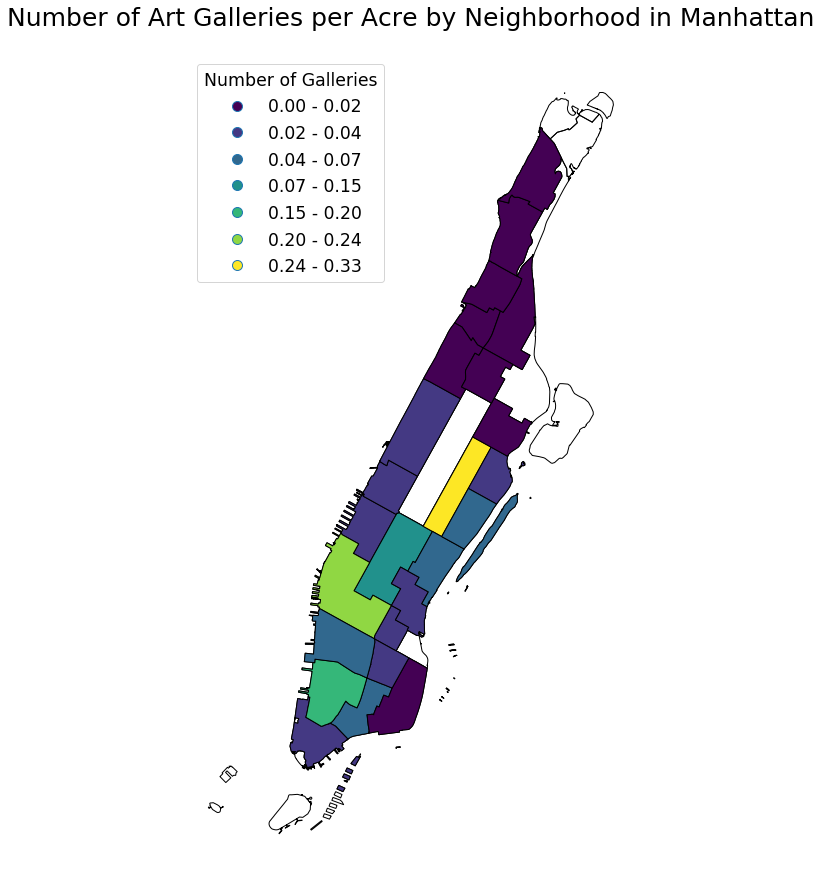

In [60]:
# defining our plot
plt.subplots(figsize=(20,15))
ax = plt.subplot()

nta_mn.plot(ax=ax, color='None', edgecolor='black')

nta_galleries.plot(column="numofgalleries_per_area", ax=ax, k=7, 
                   scheme='fisher_jenks', label=True, legend=True, 
                   legend_kwds={'loc': 'upper left', 'title': 'Number of Galleries', 
                   'title_fontsize': 'xx-large','fontsize': 'xx-large'}, 
                   cmap='viridis', edgecolor='black')

ax.set_title("Number of Art Galleries per Acre by Neighborhood in Manhattan", fontsize=25, pad=30)
plt.axis('off')

# saving figure
plt.savefig('figures/galleries-per-acre-by-neighborhood-manhattan-map.png')

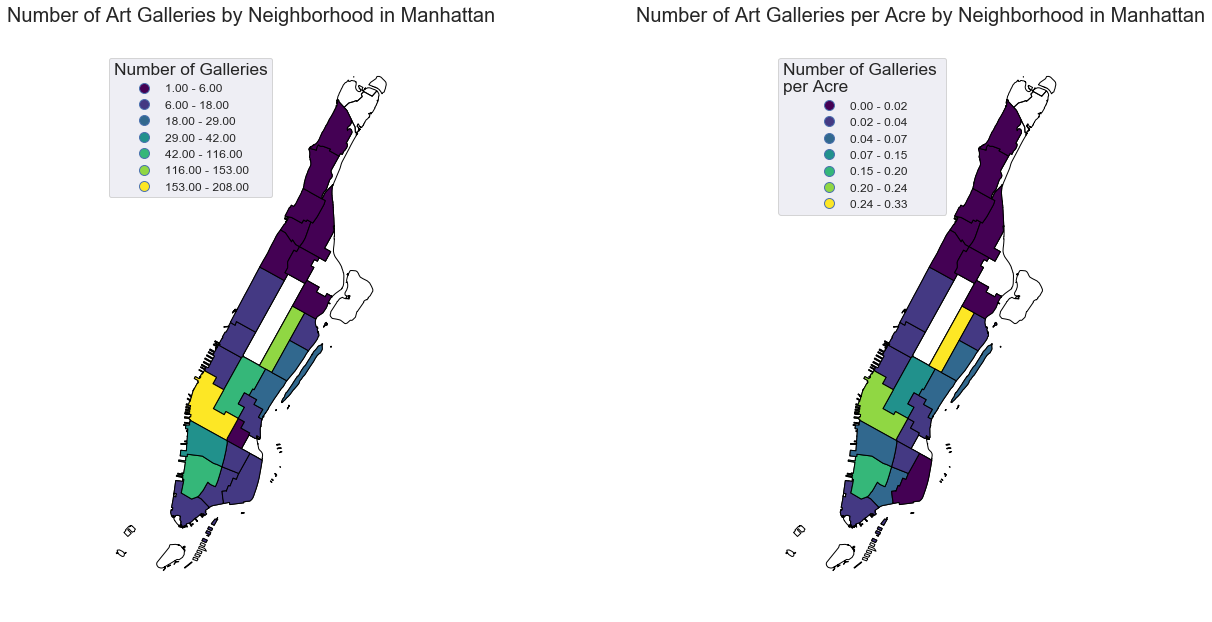

In [61]:
# defining our plot
sns.set(font_scale=1)
fig = pl.figure(figsize=(22,10))

# adding first subplot
ax = fig.add_subplot(121)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

nta_mn.plot(ax=ax, color='None', edgecolor='black')

nta_galleries.plot(column="numofgalleries", ax=ax, k=7, 
                   scheme='fisher_jenks', label=True, legend=True, 
                   legend_kwds={'loc': 'upper left', 'title': 'Number of Galleries', 
                   'title_fontsize': 'x-large','fontsize': 'medium'}, 
                   cmap='viridis', edgecolor='black')

ax.set_title("Number of Art Galleries by Neighborhood in Manhattan", fontsize=20, pad=30)
plt.axis('off')

# adding second subplot
ax = fig.add_subplot(122)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

nta_mn.plot(ax=ax, color='None', edgecolor='black')

nta_galleries.plot(column="numofgalleries_per_area", ax=ax, k=7, 
                   scheme='fisher_jenks', label=True, legend=True, 
                   legend_kwds={'loc': 'upper left', 'title': 'Number of Galleries \nper Acre', 
                   'title_fontsize': 'x-large','fontsize': 'medium'}, 
                   cmap='viridis', edgecolor='black')

ax.set_title("Number of Art Galleries per Acre by Neighborhood in Manhattan", fontsize=20, pad=30)
plt.axis('off')

# saving figure
plt.savefig('figures/count-and-area-by-neighborhood-manhattan-maps.png')

In [62]:
nta_galleries.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,area (acres),numofgalleries,numofgalleries_per_area
0,1.00000,Manhattan,061,MN06,Manhattanville,10647077.61220,17040.68655,"POLYGON ((999174.2608032241 238490.1047973094,...",246.56769,1,0.00406
1,1.00000,Manhattan,061,MN15,Clinton,18362149.83110,34481.62954,"POLYGON ((985958.6517944358 220876.7498168417,...",425.23526,10,0.02352
2,1.00000,Manhattan,061,MN27,Chinatown,14501867.88280,20786.25639,"POLYGON ((988733.8851928725 202128.9697875357,...",335.83789,17,0.05062
3,1.00000,Manhattan,061,MN25,Battery Park City-Lower Manhattan,19014299.21810,43738.49900,(POLYGON ((984032.8837890599 192223.7485961345...,440.33790,13,0.02952
4,1.00000,Manhattan,061,MN14,Lincoln Square,15805586.59240,19869.90868,"POLYGON ((991173.6492309589 222552.1517943803,...",366.02973,10,0.02732


In [63]:
nta_galleries_df = pd.DataFrame(nta_galleries)

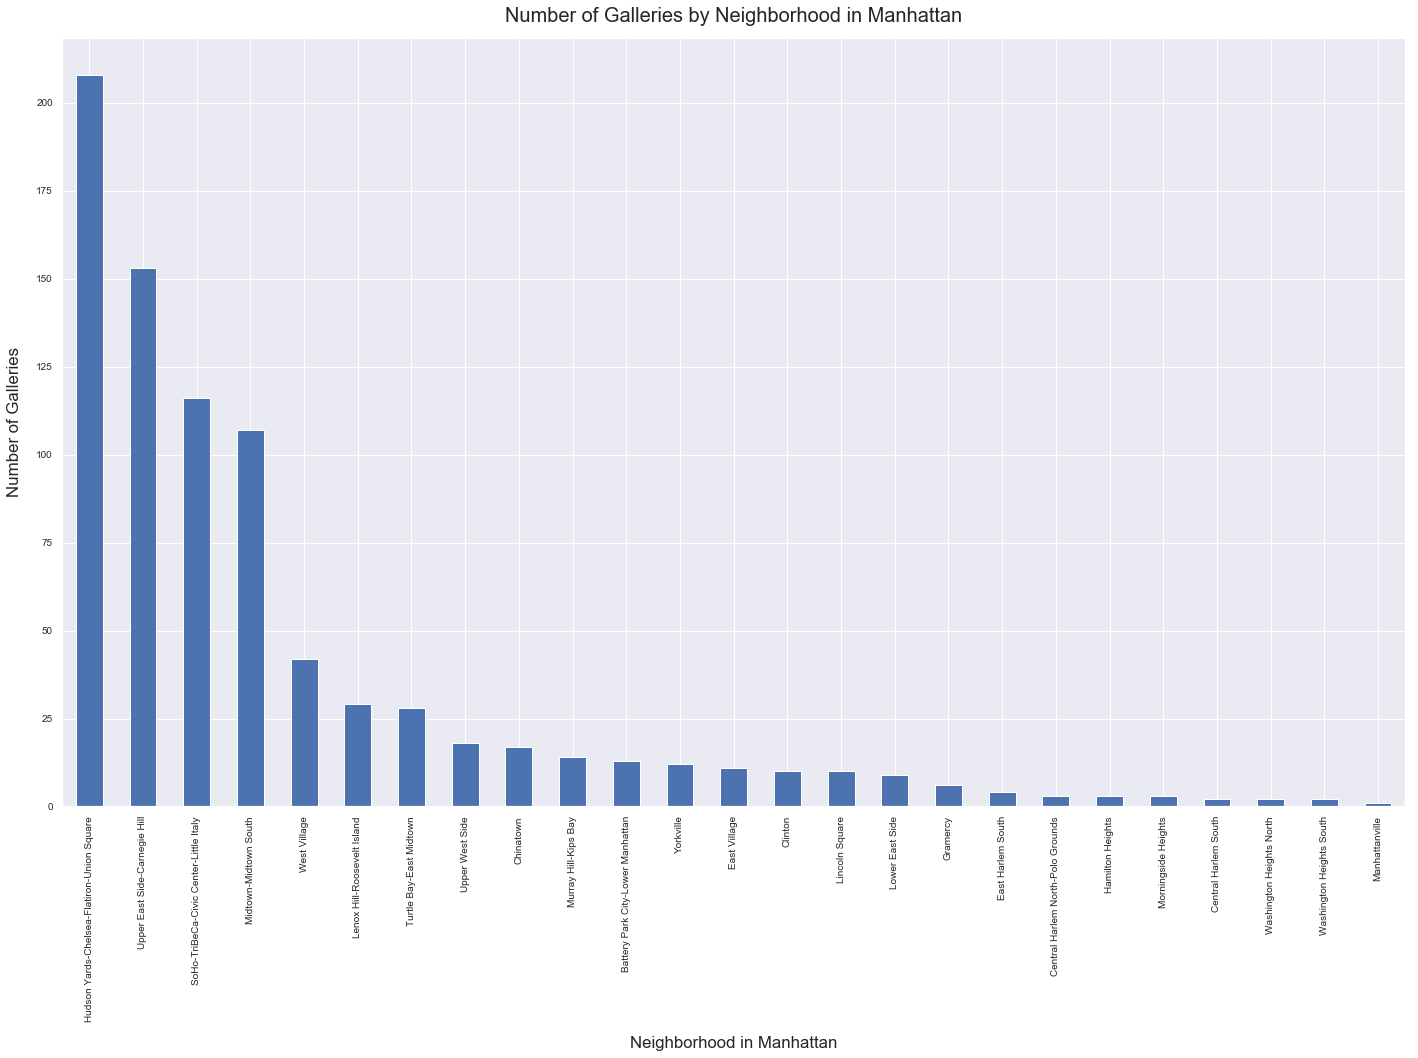

In [156]:
# defining our plot
sns.set(font_scale=1.4)
plt.subplots(figsize=(20,15))
ax = plt.subplot()

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plotting bar chart of claim amount by borough
nta_galleries_df.sort_values('numofgalleries', ascending=False).plot.bar(x='ntaname', y='numofgalleries', ax=ax, rot=90, color='b', fontsize=10, legend=False)
plt.xlabel("Neighborhood in Manhattan", labelpad=14)
plt.ylabel("Number of Galleries", labelpad=14)
plt.title("Number of Galleries by Neighborhood in Manhattan", pad=16, fontsize=20)
plt.tight_layout()

# saving figure
plt.savefig('figures/galleries-by-neighborhood-manhattan-bar.png')

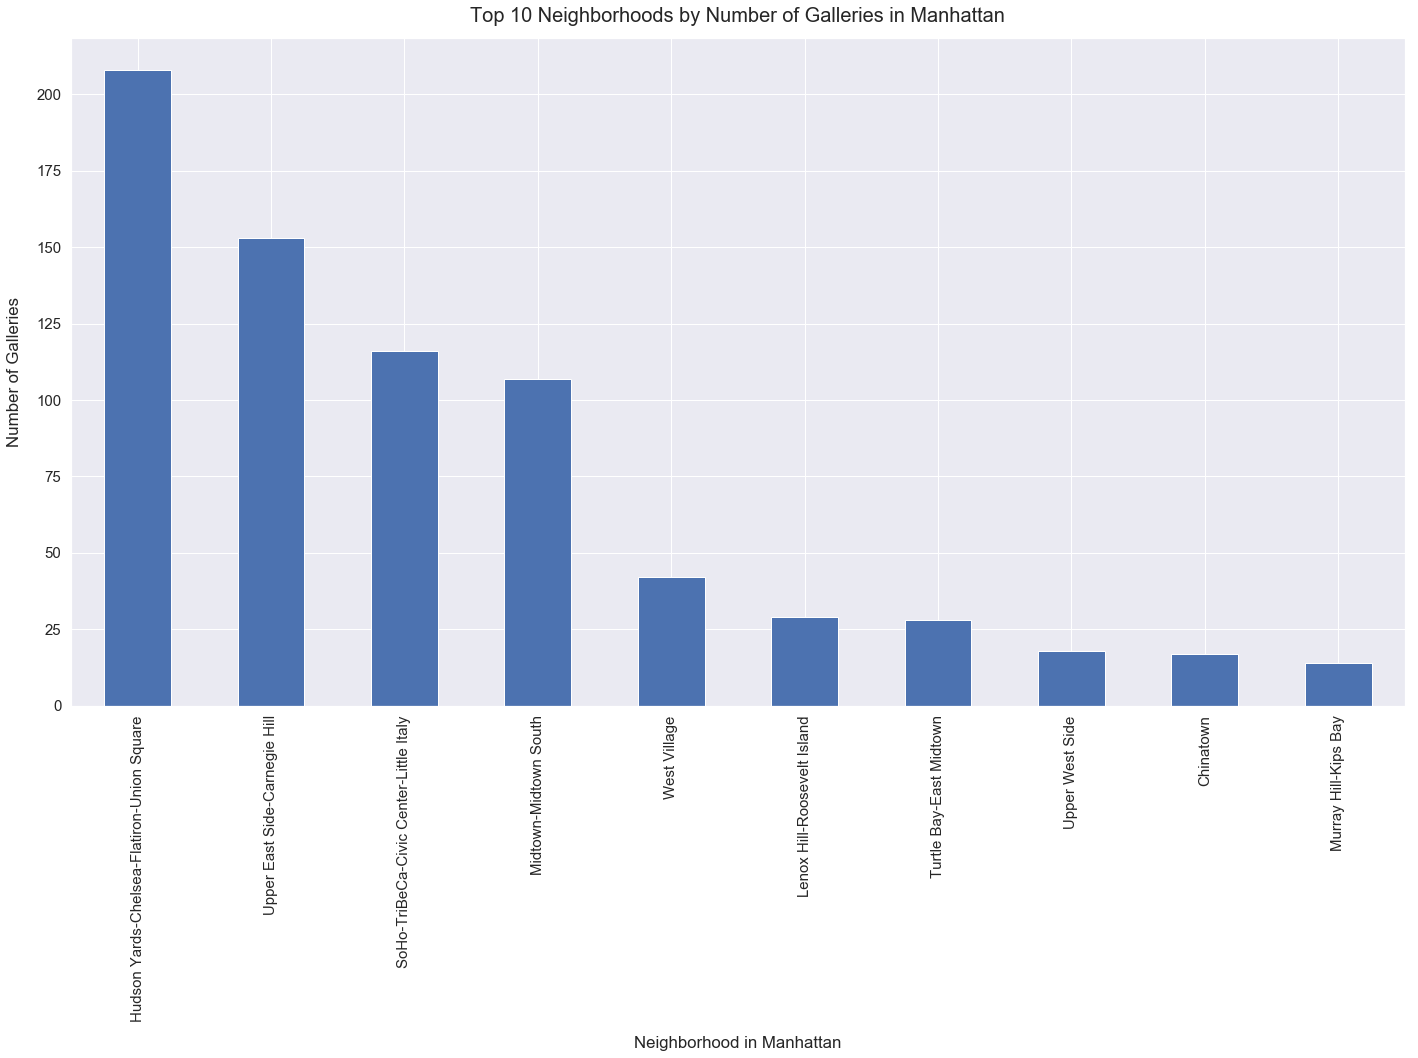

In [167]:
# defining our plot
sns.set(font_scale=1.4)
plt.subplots(figsize=(20,15))
ax = plt.subplot()

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plotting bar chart of claim amount by borough
nta_galleries_df.sort_values('numofgalleries', ascending=False).head(10).plot.bar(x='ntaname', y='numofgalleries', ax=ax, rot=90, color='b', fontsize=15, legend=False)
plt.xlabel("Neighborhood in Manhattan", labelpad=14)
plt.ylabel("Number of Galleries", labelpad=14)
plt.title("Top 10 Neighborhoods by Number of Galleries in Manhattan", pad=16, fontsize=20)
plt.tight_layout()

# saving figure
plt.savefig('figures/galleries-by-neighborhood-manhattan-bar-top10.png')

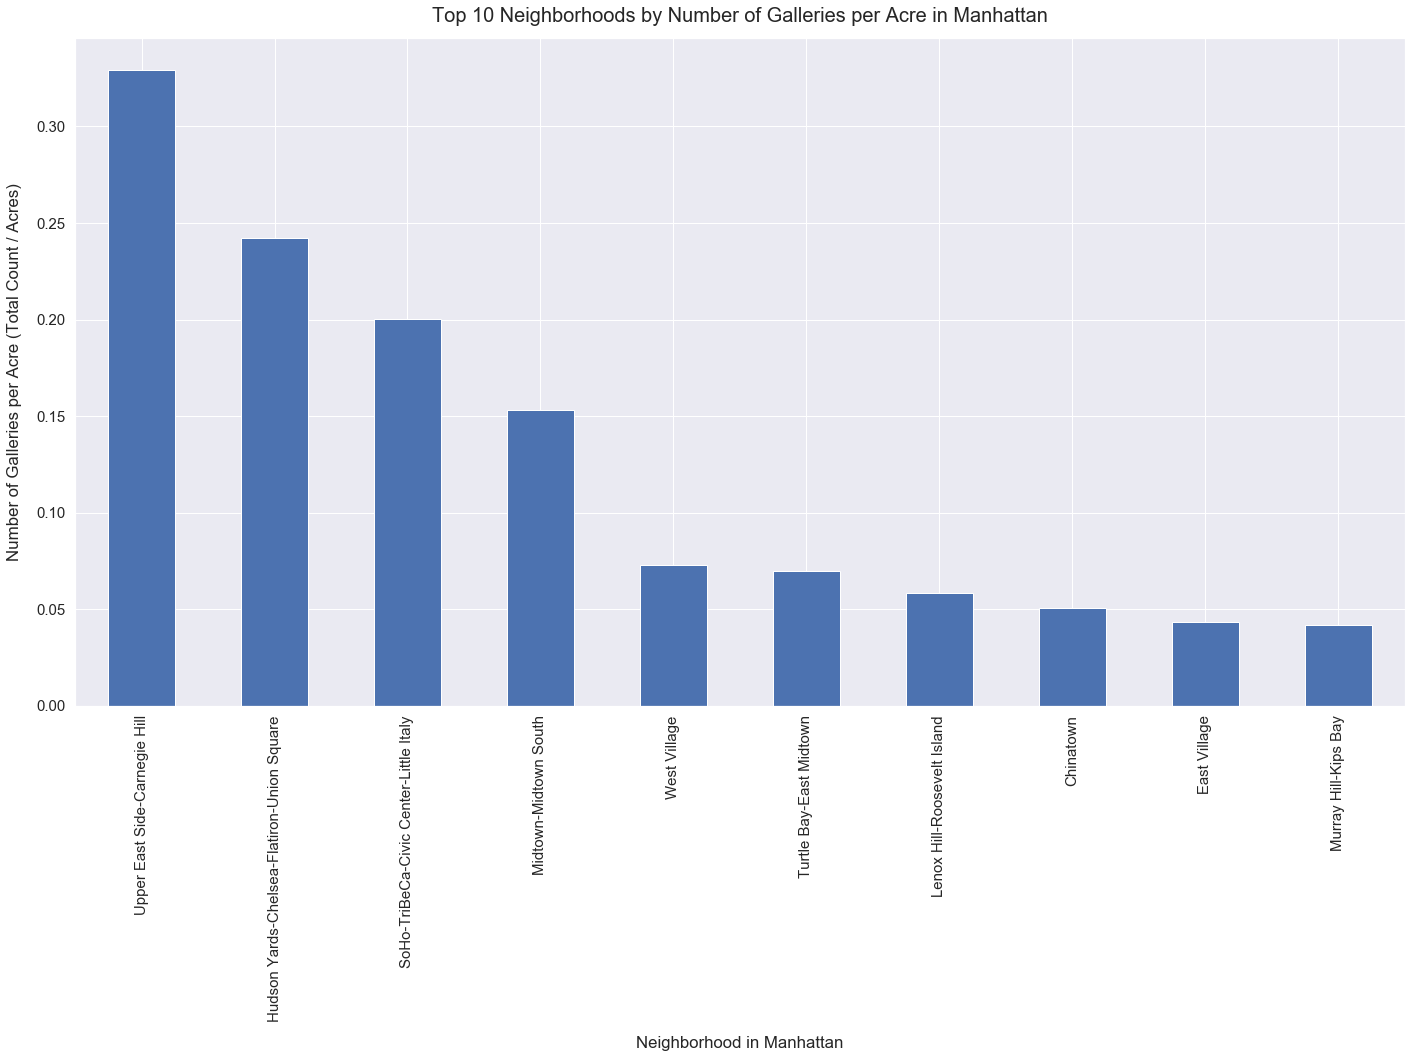

In [168]:
# defining our plot
sns.set(font_scale=1.4)
plt.subplots(figsize=(20,15))
ax = plt.subplot()

# plotting bar chart of claim amount by borough
nta_galleries_df.sort_values('numofgalleries_per_area', ascending=False).head(10).plot.bar(x='ntaname', y='numofgalleries_per_area', ax=ax, rot=90, color='b', fontsize=15, legend=False)
plt.xlabel("Neighborhood in Manhattan", labelpad=14)
plt.ylabel("Number of Galleries per Acre (Total Count / Acres)", labelpad=14)
plt.title("Top 10 Neighborhoods by Number of Galleries per Acre in Manhattan", pad=16, fontsize=20)
plt.tight_layout()

# saving figure
plt.savefig('figures/galleries-per-acre-by-neighborhood-manhattan-bar-top10.png')